## Summer School on Deep Learning Surathkal, Karnataka - 2019

### Convolutional Neural Network  Tutorial
- Download dataset from Keras
-  Visualize data (Image/Pixels)
- Reshape the data
- Normalize the data
- One hot encoding the labels
- Mounting in colab and displying Image
- Build the LeNet Model
- Visualizing the randomly initialized filters
- Keras Callbacks
- Compile the model
- validation split(sklearn)
- Fit the model
- Plot the graphs
- Evaluate on test data
- Testing on individual images on test data
- Plot the confusion Matrix
- Visualizing Learned Filters


In [1]:
import keras
from keras.datasets import mnist

Using TensorFlow backend.


**Datasets and Pre Processing**
* The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.
* The MNIST database of handwritten digits provides  training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
* http://yann.lecun.com/exdb/mnist/

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


### Visualizing the dataset

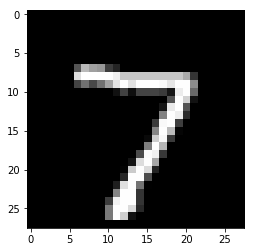

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='gray')

In [5]:
print(xtest[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [6]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

60000
28
28


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1).astype('float32')/255
xtest =  xtest.reshape(xtest.shape[0],28,28,1).astype('float32')/255

#### One hot encoding
* Some algorithms can work with categorical data directly. For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).

* Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)

In [9]:
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
import keras
from keras import models
from keras import layers

### Mounting In Colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


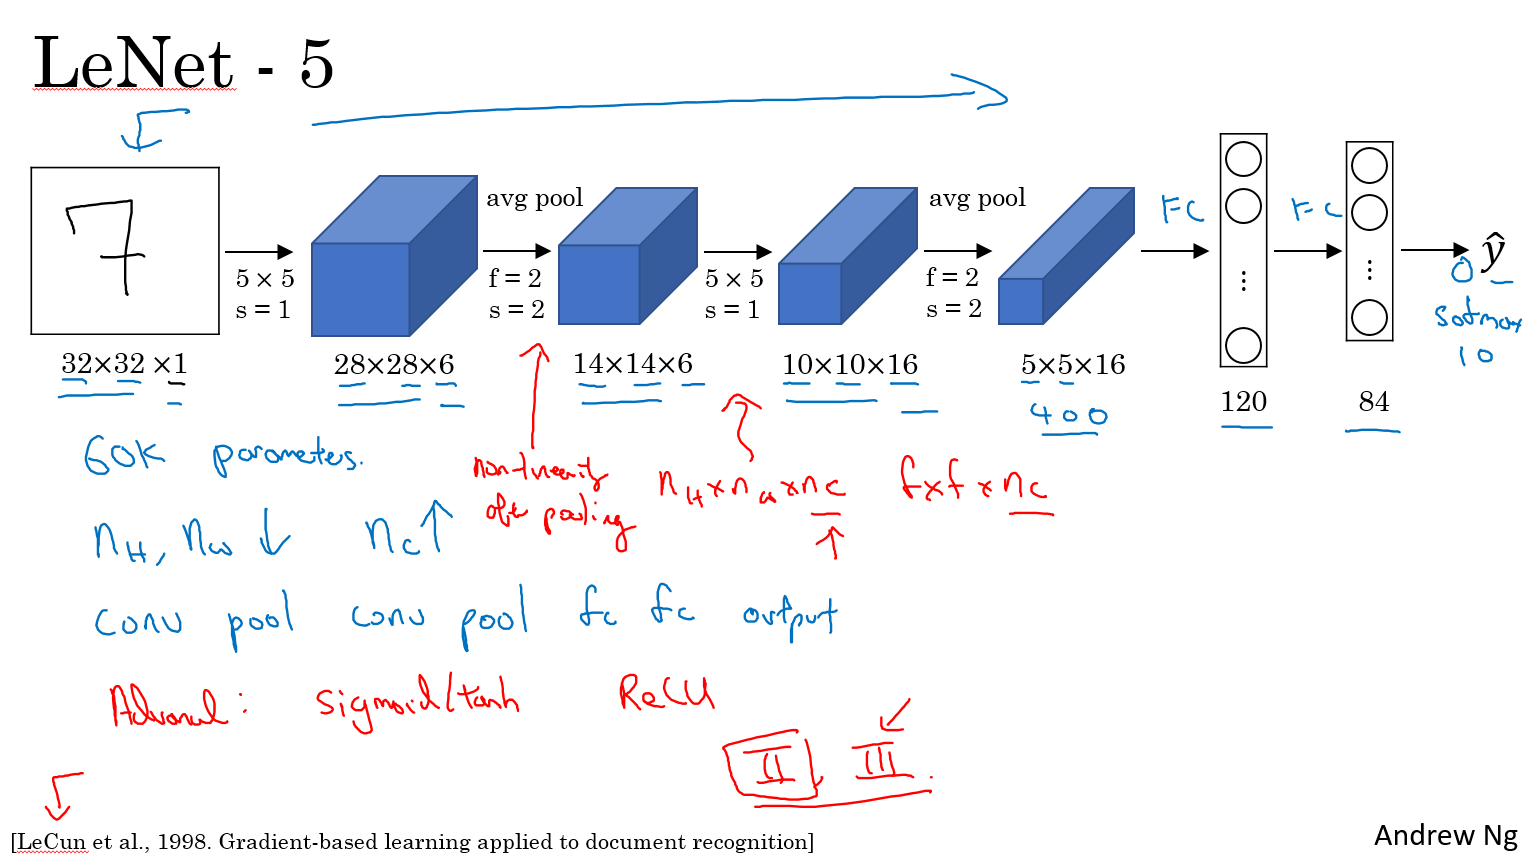

In [0]:
from IPython.display import Image, display
display(Image(filename="/content/drive/My Drive/SSDL/Day2/Image/LeNet.png"))

### LeNet Model

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
_________________________________________________________________
dens

### Saving Model as Image

In [0]:
from keras.utils import plot_model
plot_model(model, to_file="/content/drive/My Drive/SSDL/Day2/Image/LNETT.png")

### Visualization of randomly initialized filters


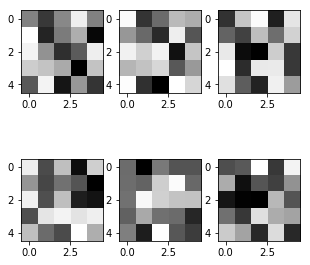

In [12]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

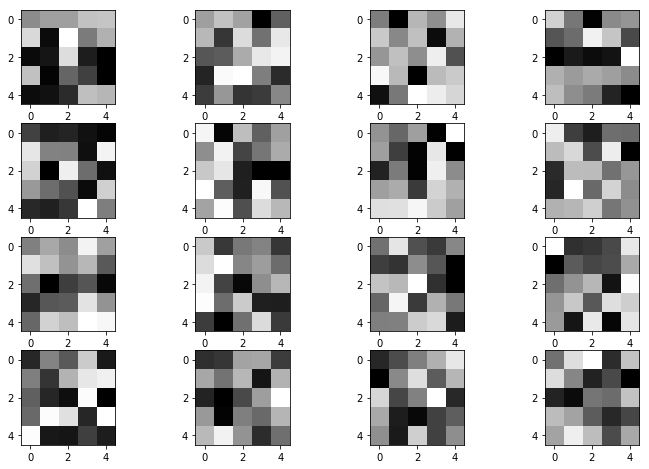

In [13]:
#https://www.codeastar.com/visualize-convolutional-neural-network/
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

### Compile the model

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [0]:
from sklearn.model_selection import train_test_split 

### Keras Callbacks
* ModelCheckPoint
* TensorBoard
* CSVLogger
* ReduceOnPlateau
* Learning rate scheduler
* EarlyStopping



####1.ModelCheckPoint
ModelCheckPoint saves the model after every epoch, We have to save the model (best model) with the least validation loss.
####2.TensorBoard
TensorFlow visualization toolkit.
####3.CSVLogger
Write the epoch results to a CSV file.
####4.ReduceOnPlateau
This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
#### 5. LearningRateScheduler
A function that takes an epoch index as input (integer, indexed from 0) and current learning rate and returns a new learning rate as output (float).
#### 6. EarlyStopping
Stop training when a monitored quantity has stopped improving.



In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [17]:
import os
os.chdir("/content/drive/My Drive/SSDL/Day2")
#tensorboard --logdir=F:\logs\logs
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping
mc = ModelCheckpoint('Models/cnn_mnist_lnet.h5', monitor='val_loss', save_best_only=True)

tb = TensorBoard(log_dir='Models/logs', write_graph=True,write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('Models/cnn_mnist_lnet.h5.csv',append=True)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
lrate = LearningRateScheduler(step_decay)
ea = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)


FileNotFoundError: ignored

### Fit the model

In [0]:
#history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, epochs=25, verbose=2)

In [19]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, epochs=25, verbose=2,callbacks=[cv,mc,tb])

NameError: ignored

### Evaluate

In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

10000/10000 [==============================] - 0s 48us/step
0.11043081822395324
0.9656


### Loss and Accuracy Curves

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(25)

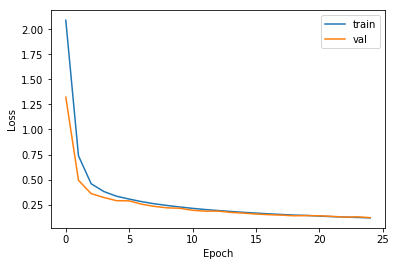

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

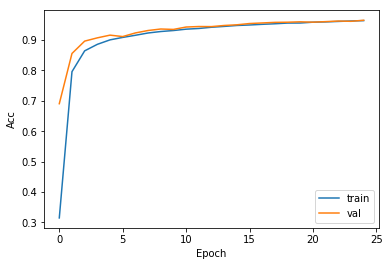

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

### Prediction

In [0]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[1.2117872e-05 2.2555592e-07 4.8721407e-04 1.4373352e-03 1.8378306e-07
  3.0267536e-06 9.8507953e-13 9.9801195e-01 3.4296497e-06 4.4479388e-05]]
7


1 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
2 Actual is  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted is 2
3 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
4 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
5 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
6 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
7 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
8 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
9 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
10 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
11 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
12 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
13 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
14 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
15 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
16 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
17 Actual is  [0. 0. 0. 0. 0. 0. 

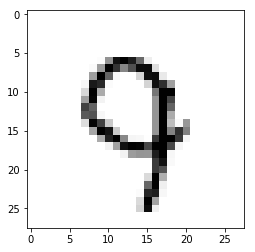

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(1000):
    plt.imshow(xtest[i].reshape(28, 28),cmap='Greys')
    pred = model.predict(xtest[i].reshape(1, 28, 28, 1))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

### Confusion Matrix
* A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning.

* #### True Positive:

Actual class is Yes predicted class is  Yes
* #### True Negative:

Actual class is No predicted class is  No
* #### False Positive:

Actual class is No predicted class is  Yes
* #### False Negative:

Actual class is Yes predicted class is  Yes

https://skymind.ai/wiki/accuracy-precision-recall-f1

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.99      0.98       980
     class 1       0.99      0.99      0.99      1135
     class 2       0.97      0.98      0.97      1032
     class 3       0.96      0.96      0.96      1010
     class 4       0.97      0.95      0.96       982
     class 5       0.98      0.95      0.96       892
     class 6       0.97      0.97      0.97       958
     class 7       0.97      0.95      0.96      1028
     class 8       0.94      0.97      0.95       974
     class 9       0.93      0.95      0.94      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 966    0    0    1    0    1    6    1    4    1]
 [   0 1122    2    1    0    1    2    0    7    0]
 [   3    1 1012    4    2    1    1    3    5    0]
 [   0    2    6  969    0    4    0    6   16    7]
 [   1    0    6    0  935    0    6    1    3   30]
 [   3    3    0   14    0  843    6    2   16    5]
 [   8    3    0    1    4    4  934    0    4    0]
 [   1    3   15    4    1    0    0  975    4   25]
 [   4    0    2    9    2    6    3    5  942    1]
 [   4    5    1    8   18    2    0    7    6  958]]


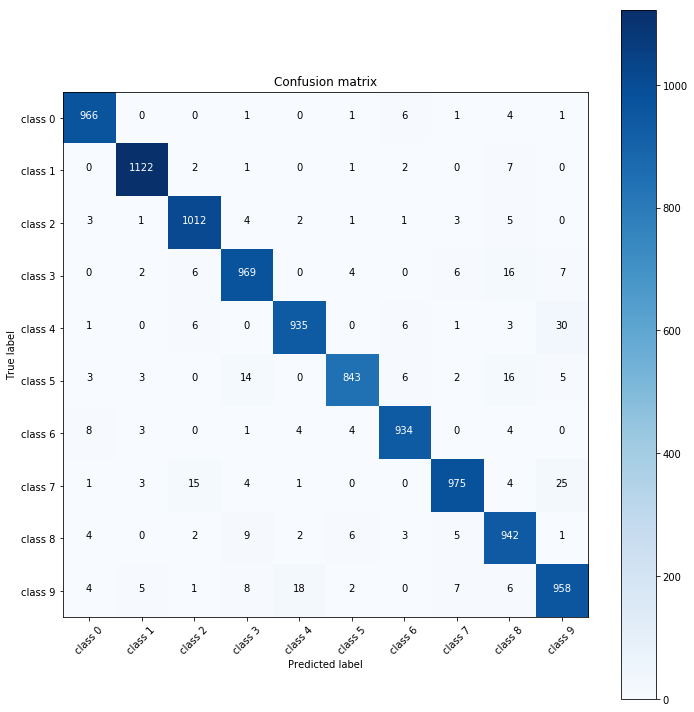

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

### Layers of Model

In [0]:
for layer in model.layers:
  print(layer)

### Visualizing The Activations

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,28,28,1))


In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

(1, 24, 24, 6)
(1, 12, 12, 6)
(1, 8, 8, 16)
(1, 4, 4, 16)
(1, 256)
(1, 120)
(1, 84)
(1, 10)


**Ist Activation (Convolution_1)**

(1, 24, 24, 6)


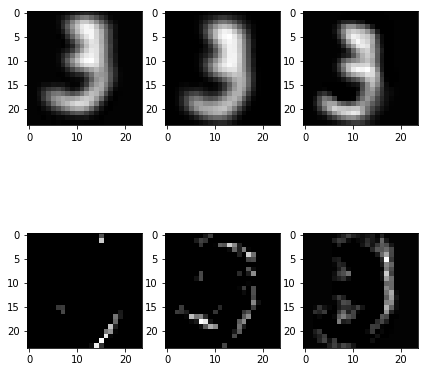

In [0]:
print(activations[0].shape)
display_activation(activations,3,2,0)

**2nd Activation (MaxPooling_1)**

(1, 12, 12, 6)


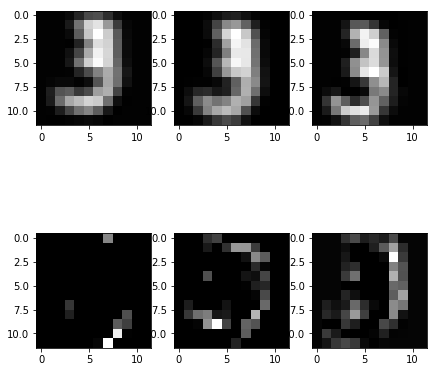

In [0]:
print(activations[1].shape)
display_activation(activations,3,2,1)

**3rd Activation (Convolution_2)**

(1, 8, 8, 16)


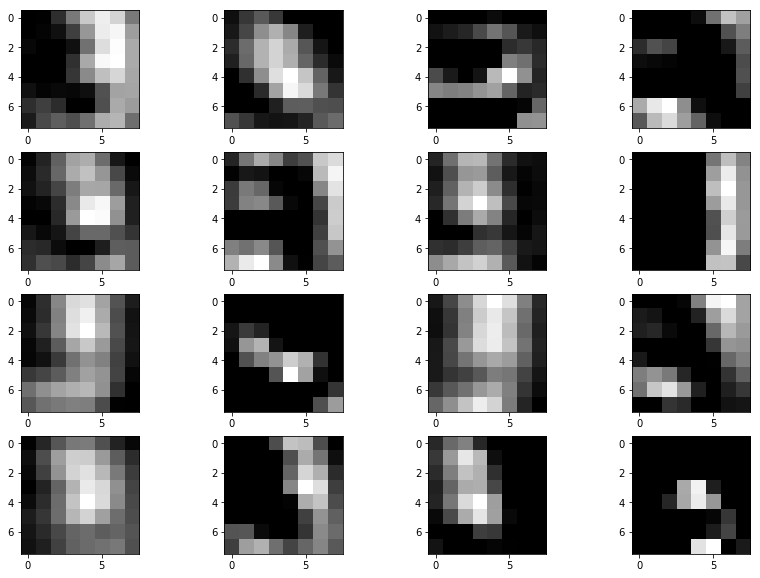

In [0]:
print(activations[2].shape)
display_activation(activations,4,4,2)

**4th Activation (MaxPooling_2)**

(1, 4, 4, 16)


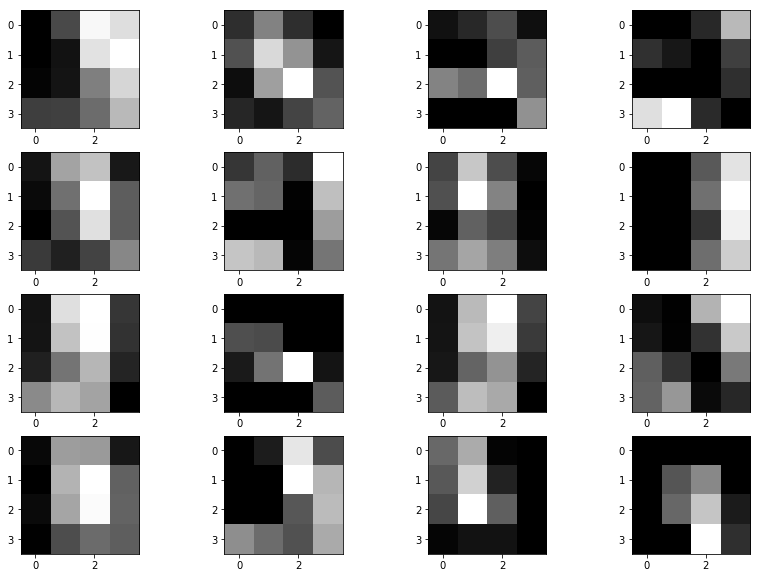

In [0]:
print(activations[3].shape)
display_activation(activations,4,4,3)

**Classification in final layer**

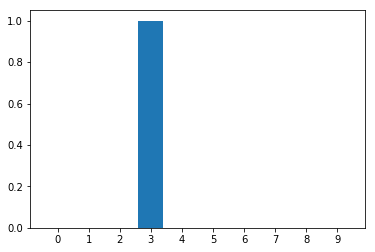

In [0]:
act_dense_3  = activations[7]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

###  Visualization of filters

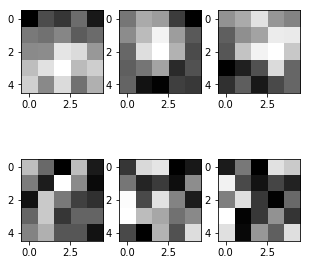

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[-0.22  0.04 -0.04  0.14 -0.14]
 [ 0.19  0.16  0.23  0.09  0.14]
 [ 0.24  0.25  0.54  0.51  0.29]
 [ 0.41  0.53  0.63  0.4   0.47]
 [ 0.47  0.24  0.51  0.16  0.37]]

[[0.34 0.47 0.44 0.2  0.05]
 [0.4  0.51 0.65 0.44 0.27]
 [0.3  0.6  0.68 0.49 0.23]
 [0.28 0.34 0.45 0.15 0.25]
 [0.29 0.09 0.05 0.2  0.19]]

[[ 0.09  0.13  0.24  0.1   0.06]
 [-0.01  0.08  0.12  0.26  0.25]
 [-0.02  0.18  0.27  0.29  0.19]
 [-0.19 -0.13 -0.03  0.23  0.01]
 [-0.09 -0.01 -0.14 -0.05  0.01]]

[[ 0.07 -0.04 -0.18  0.07 -0.14]
 [-0.01 -0.14  0.16  0.   -0.16]
 [-0.15  0.09 -0.02 -0.09 -0.11]
 [-0.04  0.09 -0.1  -0.04 -0.04]
 [-0.    0.05 -0.06 -0.06 -0.15]]

[[-0.11  0.11  0.13 -0.18 -0.15]
 [-0.02 -0.13 -0.1  -0.17  0.01]
 [ 0.16 -0.08  0.12 -0.   -0.15]
 [ 0.16  0.07  0.04 -0.03  0.  ]
 [-0.09 -0.19  0.06 -0.07  0.12]]

[[-0.13  0.   -0.17  0.16  0.12]
 [ 0.18 -0.06 -0.15 -0.07 -0.12]
 [ 0.01  0.15 -0.09 -0.17 -0.02]
 [ 0.2  -0.17 -0.09  0.04 -0.1 ]
 [ 0.16 -0.16  0.05 -0.03  0.15]]


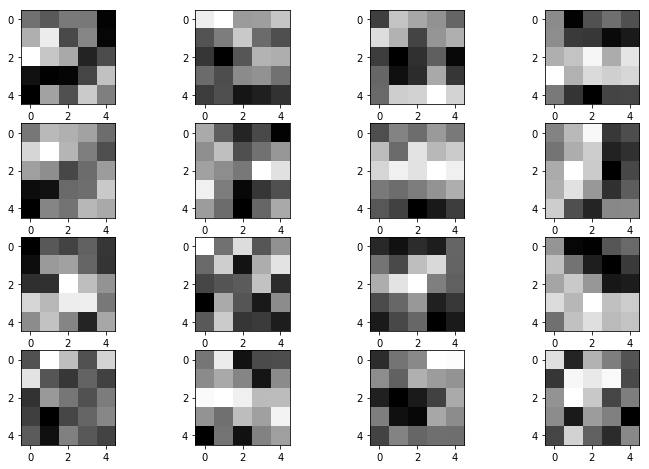

In [0]:
#https://www.codeastar.com/visualize-convolutional-neural-network/
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[ 0.03  0.    0.04  0.04 -0.1 ]
 [ 0.1   0.18 -0.02  0.05 -0.1 ]
 [ 0.2   0.13  0.1  -0.06 -0.01]
 [-0.09 -0.1  -0.1  -0.02  0.12]
 [-0.11  0.09 -0.01  0.14  0.05]]

[[ 0.19  0.22  0.07  0.07  0.13]
 [-0.04  0.02  0.14 -0.01 -0.05]
 [-0.09 -0.17 -0.04  0.1   0.1 ]
 [-0.01 -0.05  0.04  0.05  0.  ]
 [-0.08 -0.05 -0.14 -0.12 -0.09]]

[[-5.10e-02  1.23e-01  8.50e-02  5.80e-02 -1.39e-03]
 [ 1.57e-01  1.01e-01 -4.49e-02  6.13e-02  9.61e-02]
 [-5.37e-02 -1.35e-01 -7.09e-02 -9.49e-03 -1.23e-01]
 [ 1.82e-04 -1.14e-01 -7.50e-02  8.86e-02 -6.31e-02]
 [ 4.63e-03  1.37e-01  1.43e-01  2.02e-01  1.45e-01]]

[[ 0.   -0.19 -0.08 -0.04 -0.08]
 [ 0.   -0.11 -0.12 -0.18 -0.16]
 [ 0.05  0.08  0.15  0.05  0.13]
 [ 0.17  0.05  0.11  0.1   0.11]
 [-0.02 -0.12 -0.2  -0.1  -0.1 ]]

[[-0.    0.15  0.13  0.1  -0.02]
 [ 0.21  0.31  0.14  0.02 -0.09]
 [ 0.09  0.05 -0.11 -0.03  0.08]
 [-0.24 -0.23 -0.03 -0.02  0.18]
 [-0.27  0.03 -0.01  0.14  0.11]]

[[ 0.07 -0.01 -0.07 -0.04 -0.11]
 [ 0.04  0.09 -0.03  0.01  0.04]